In [1]:
import pandas as pd
import datetime
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
data=pd.read_csv('C://Users//Admin//OneDrive//Desktop//HPE//feature_seln_updated.csv')

In [2]:
data.shape

(2952, 43)

In [3]:
data['START_TIME'] = pd.to_datetime(data['START_TIME'])

In [4]:
df=data[data.columns[1:]]
df=df.set_index('START_TIME')

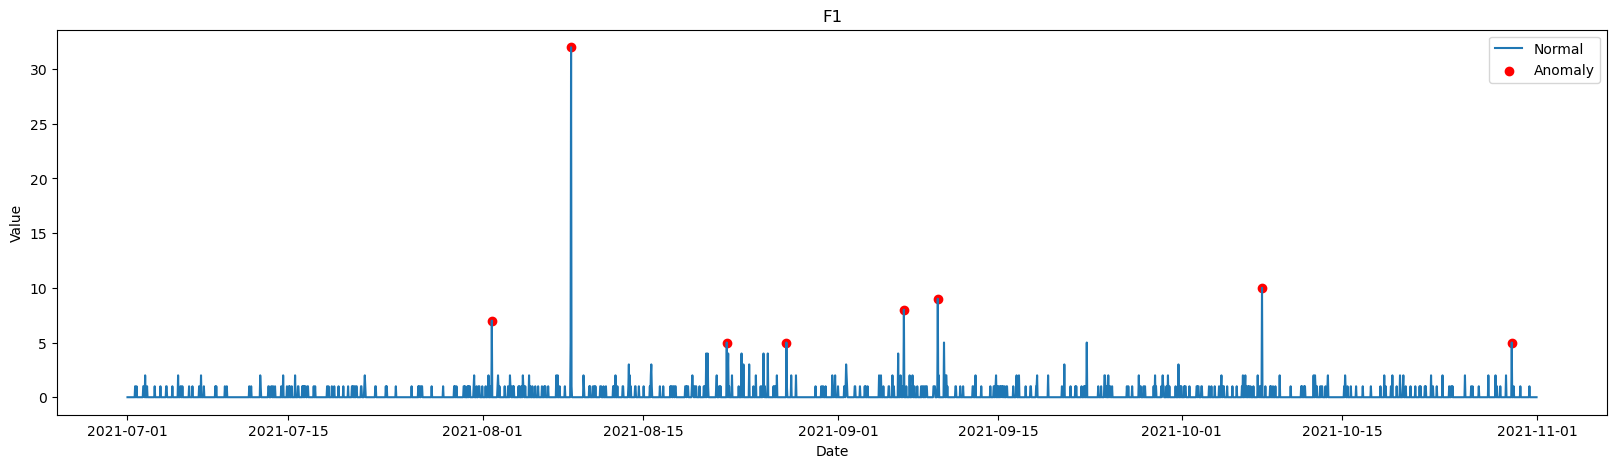

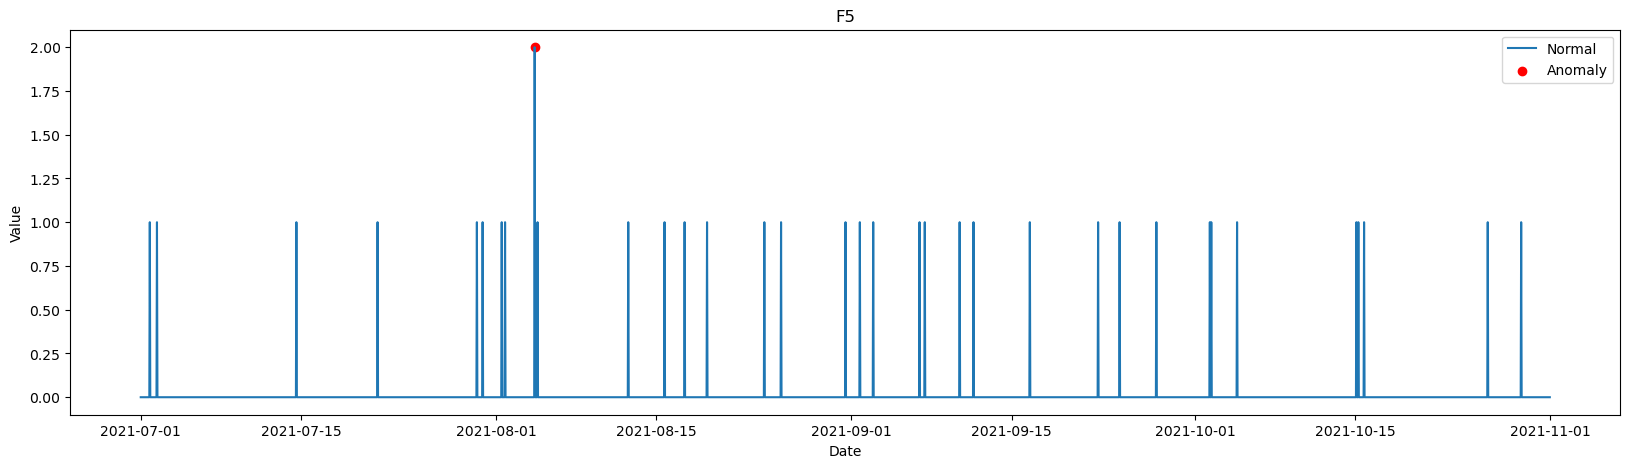

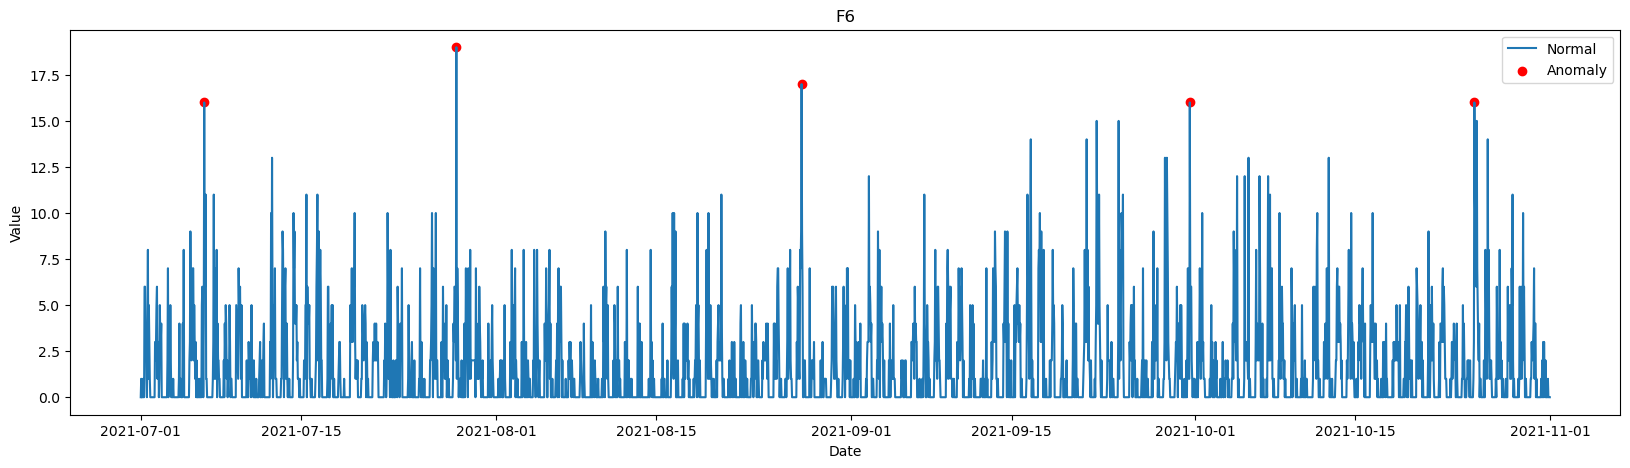

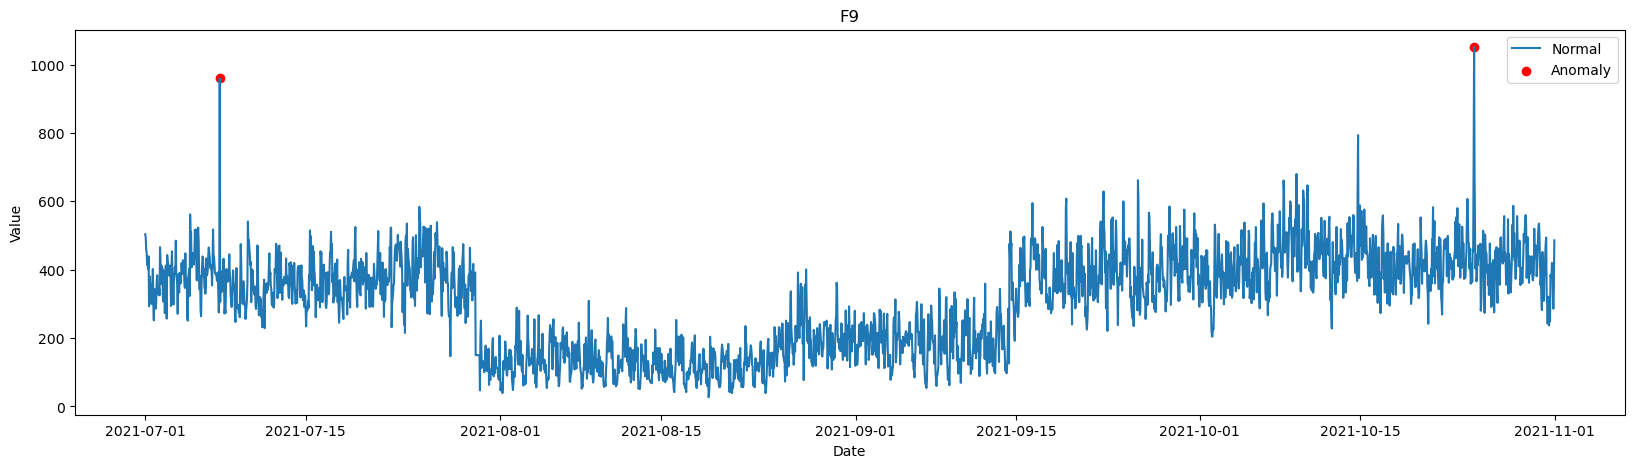

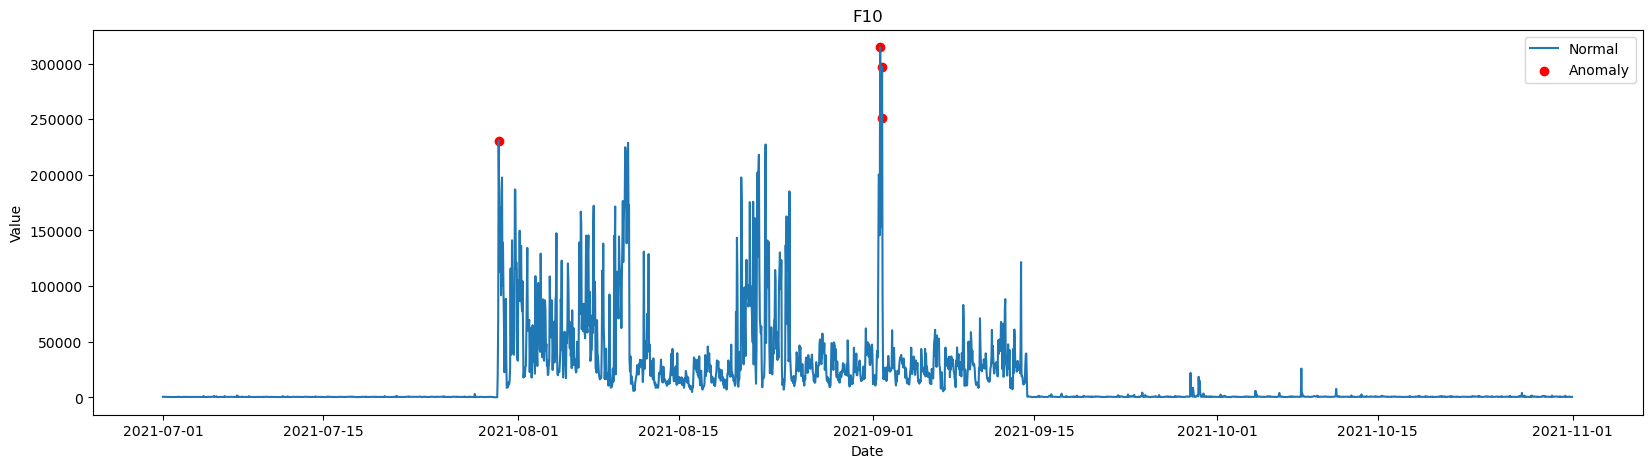

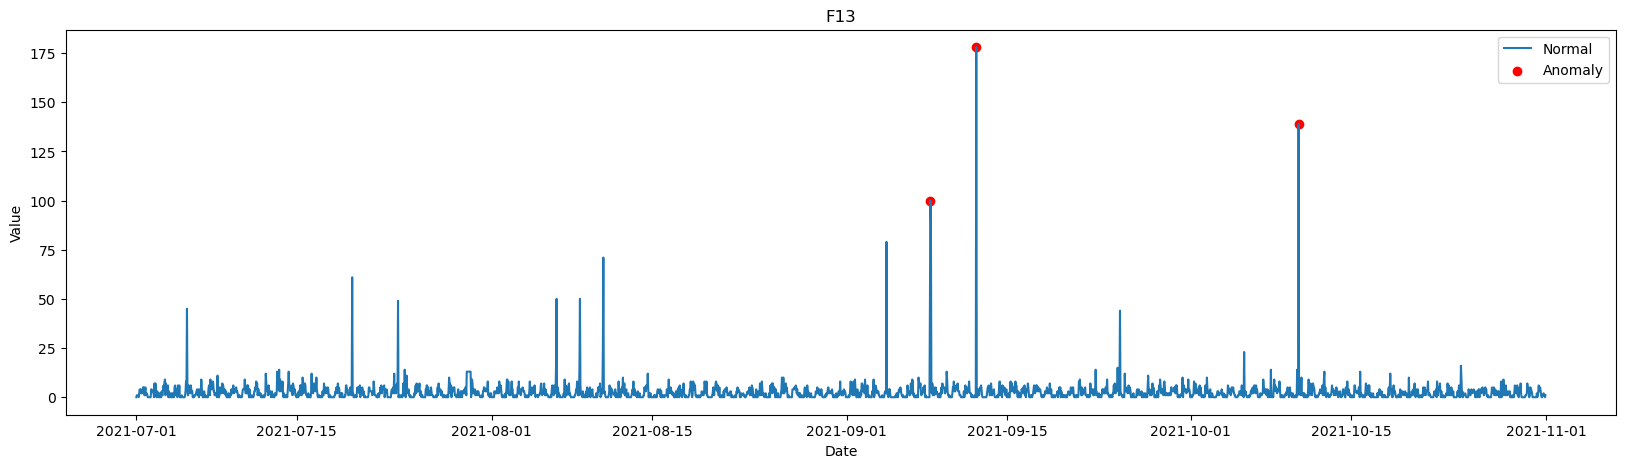

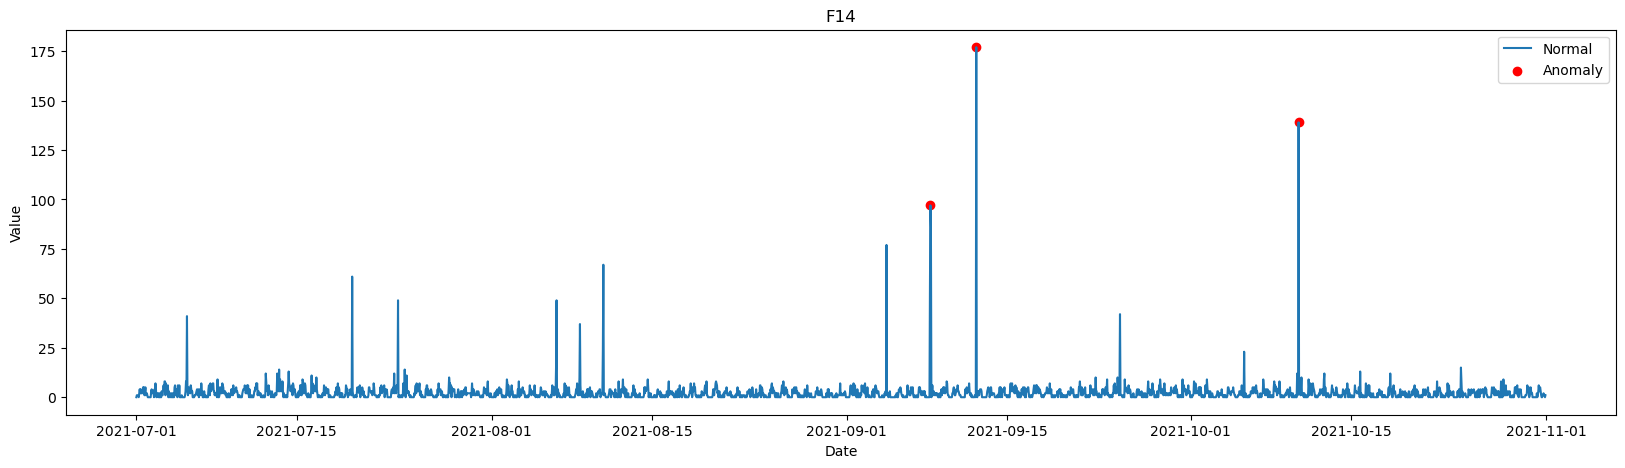

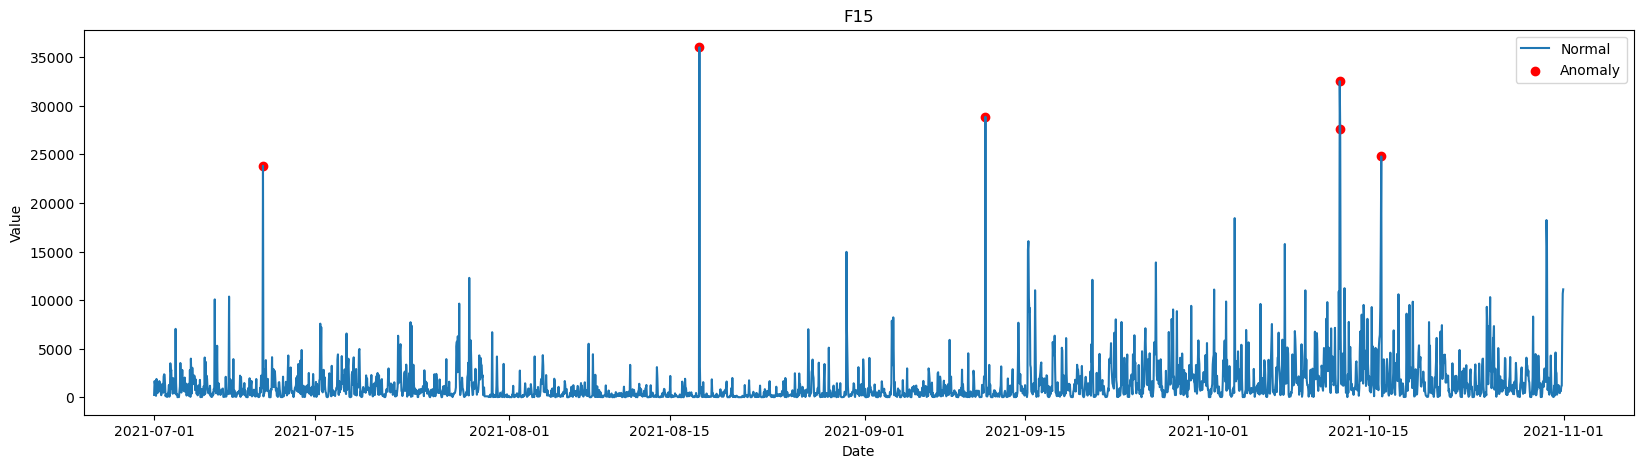

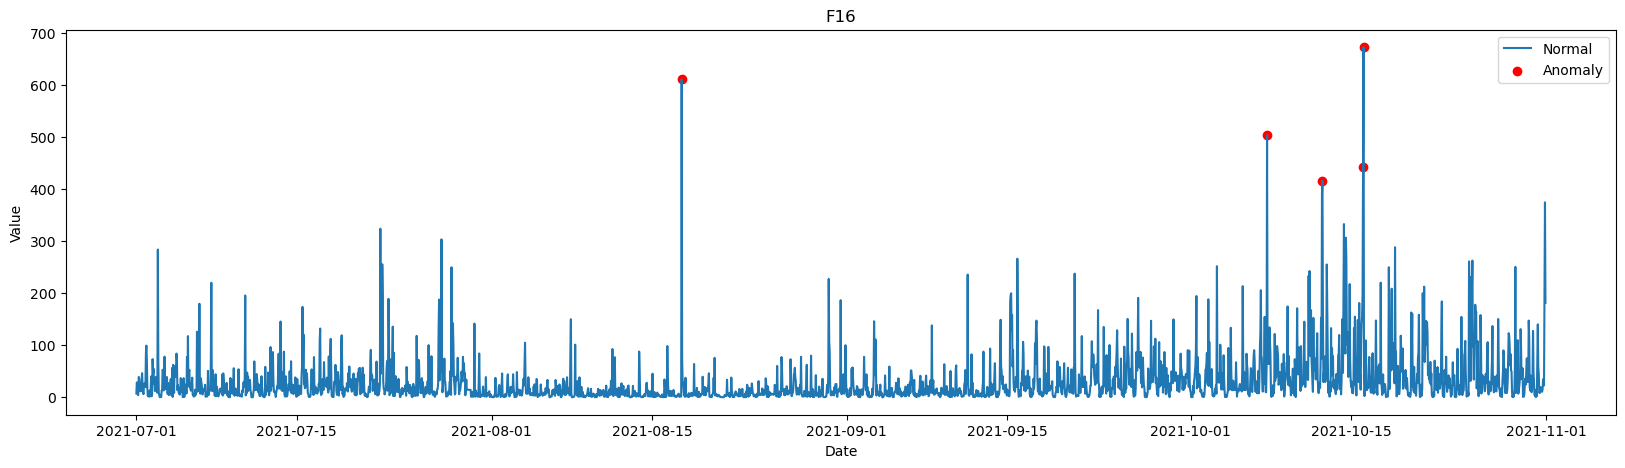

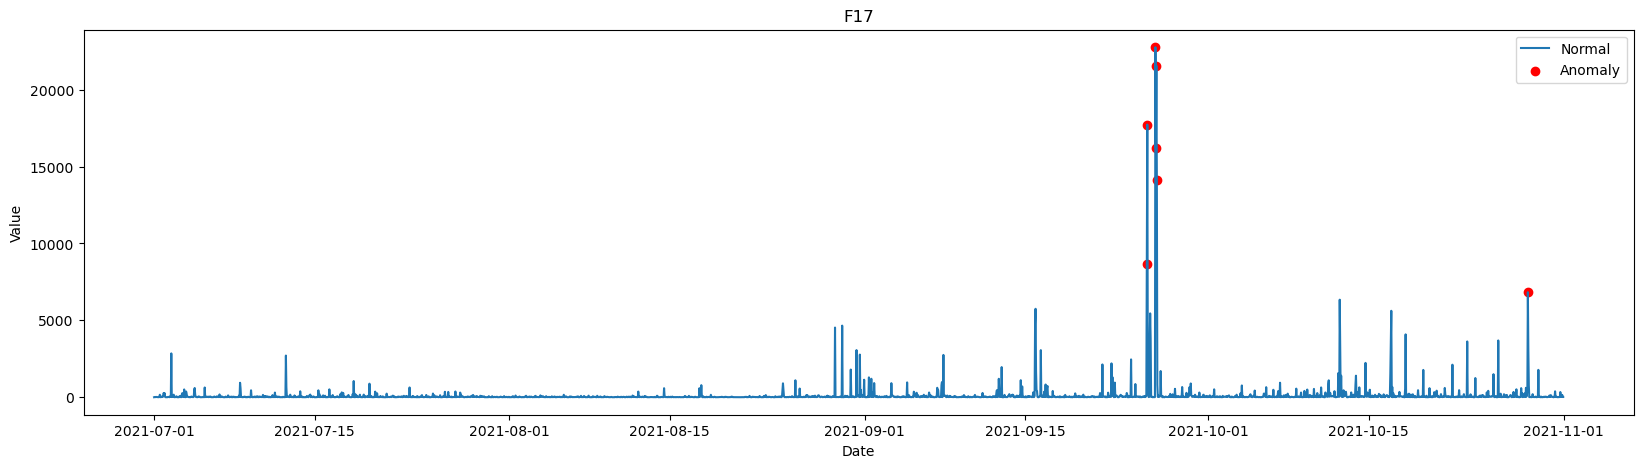

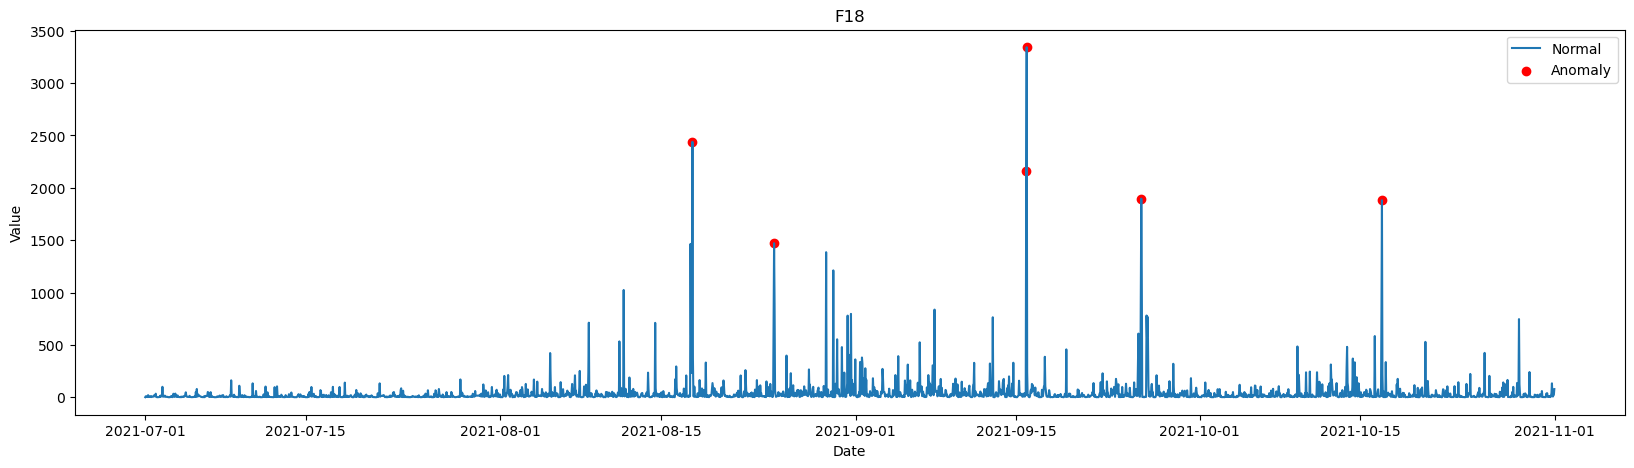

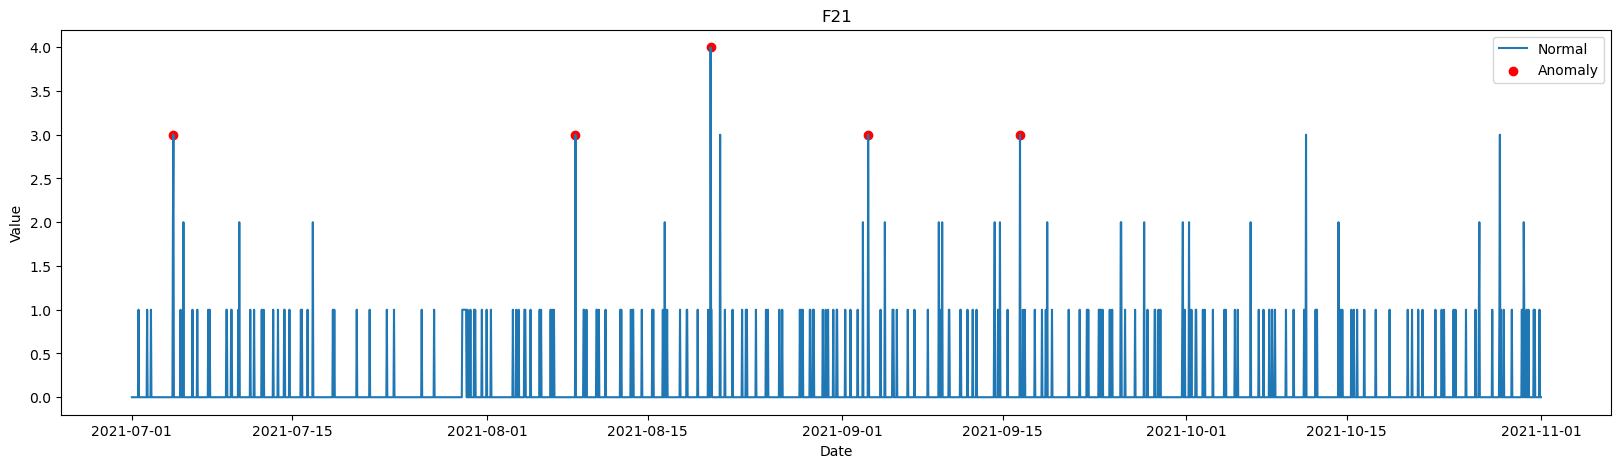

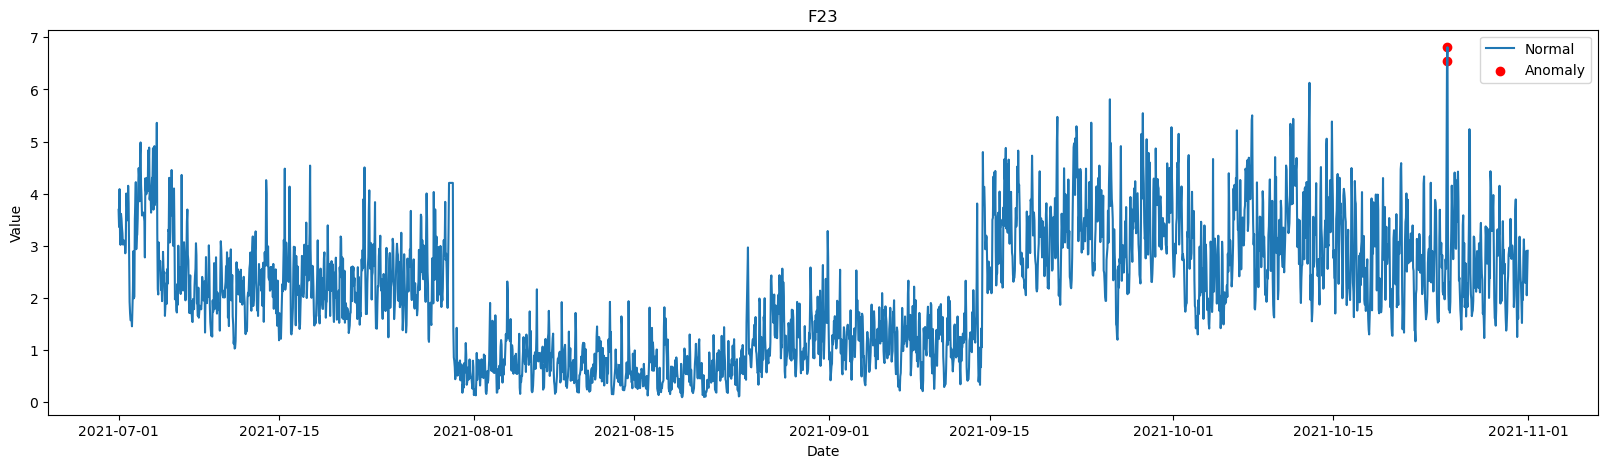

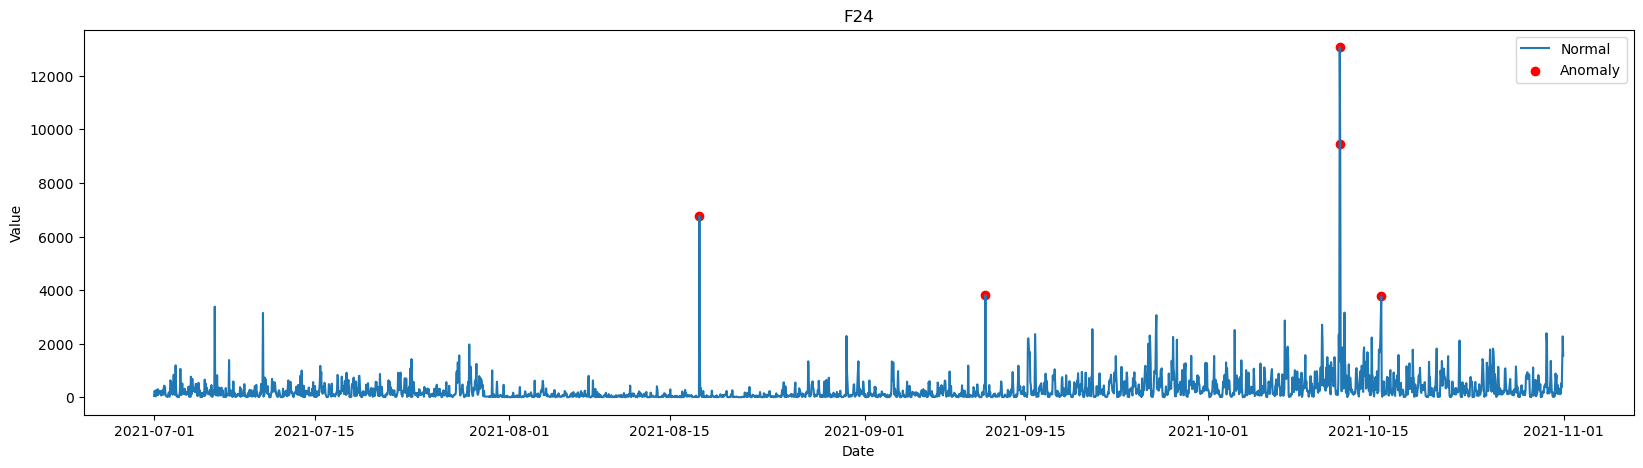

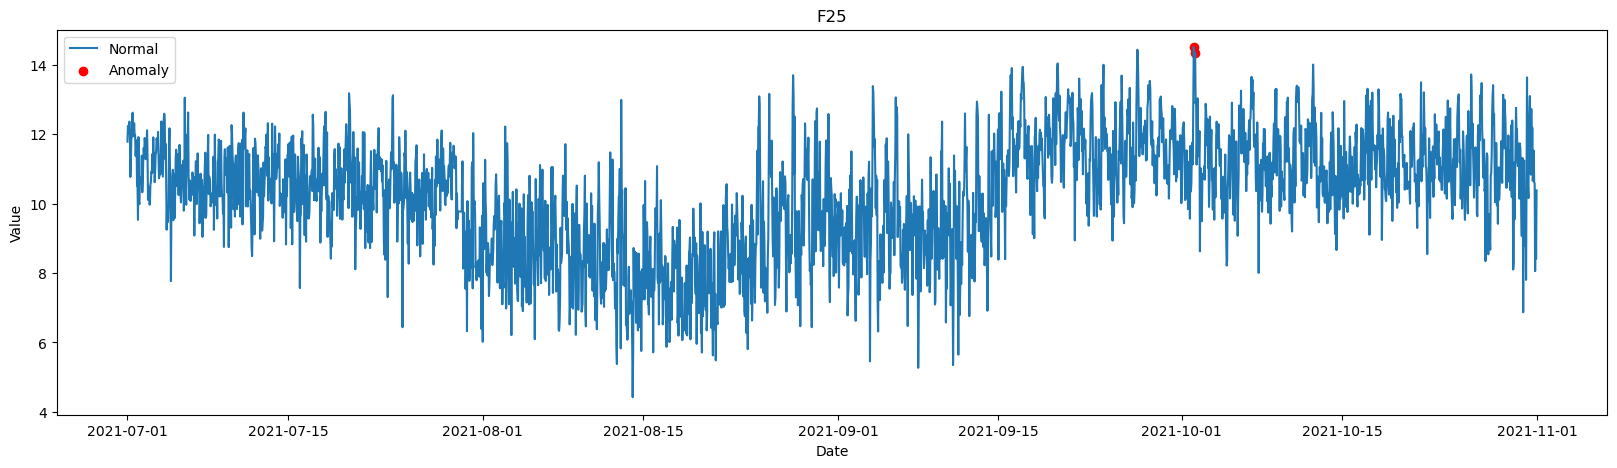

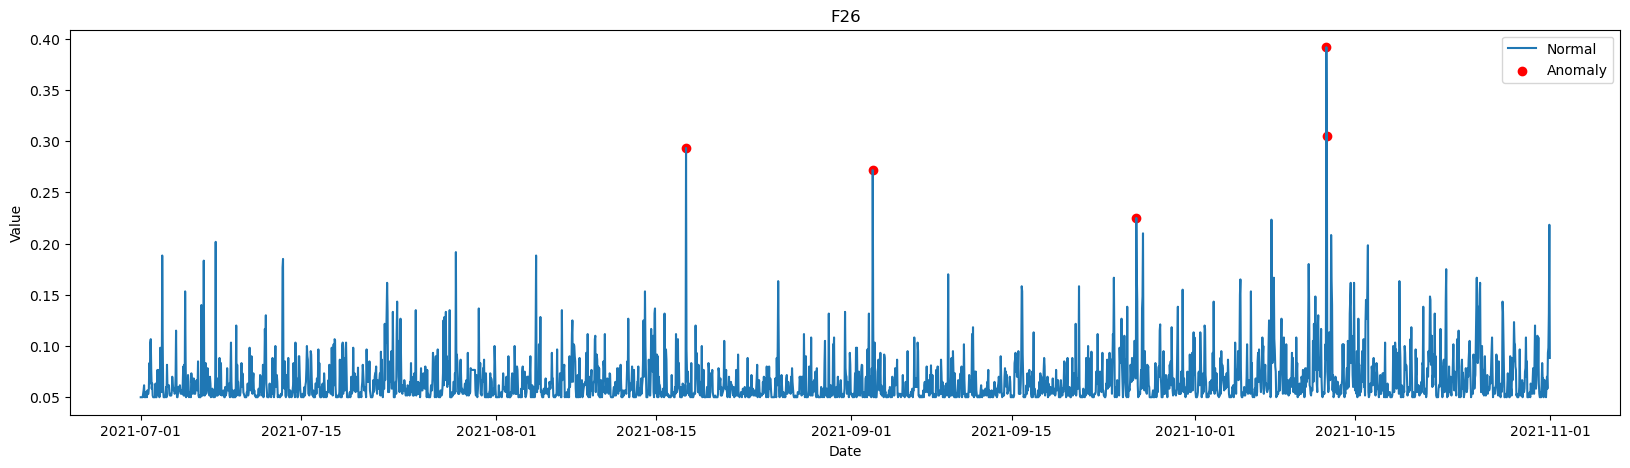

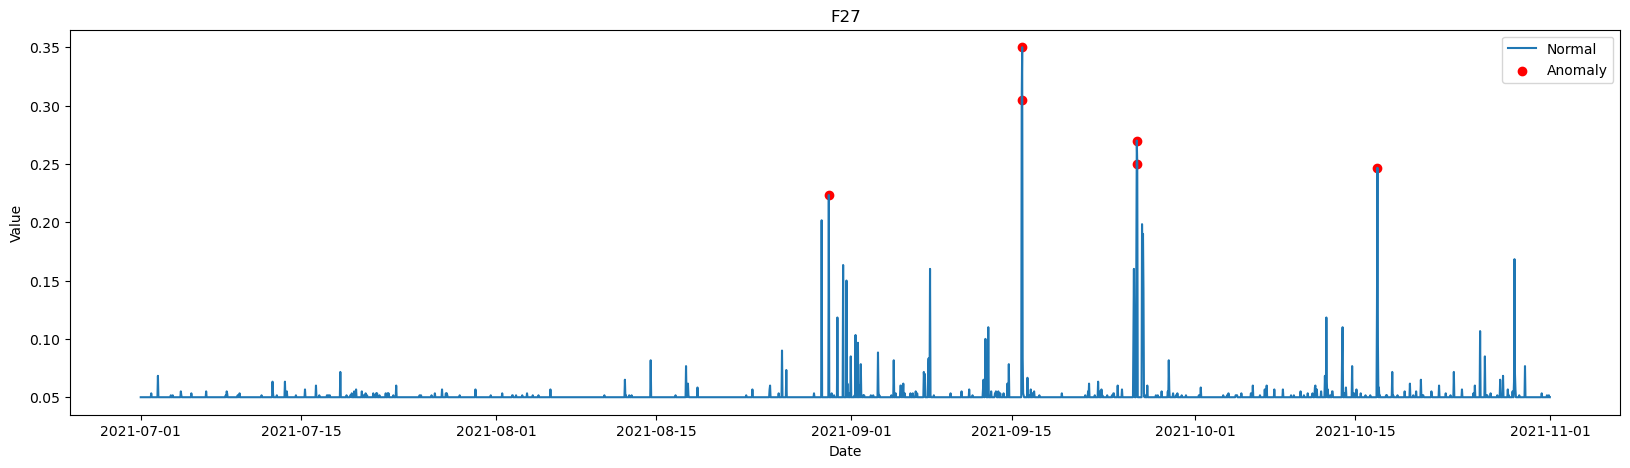

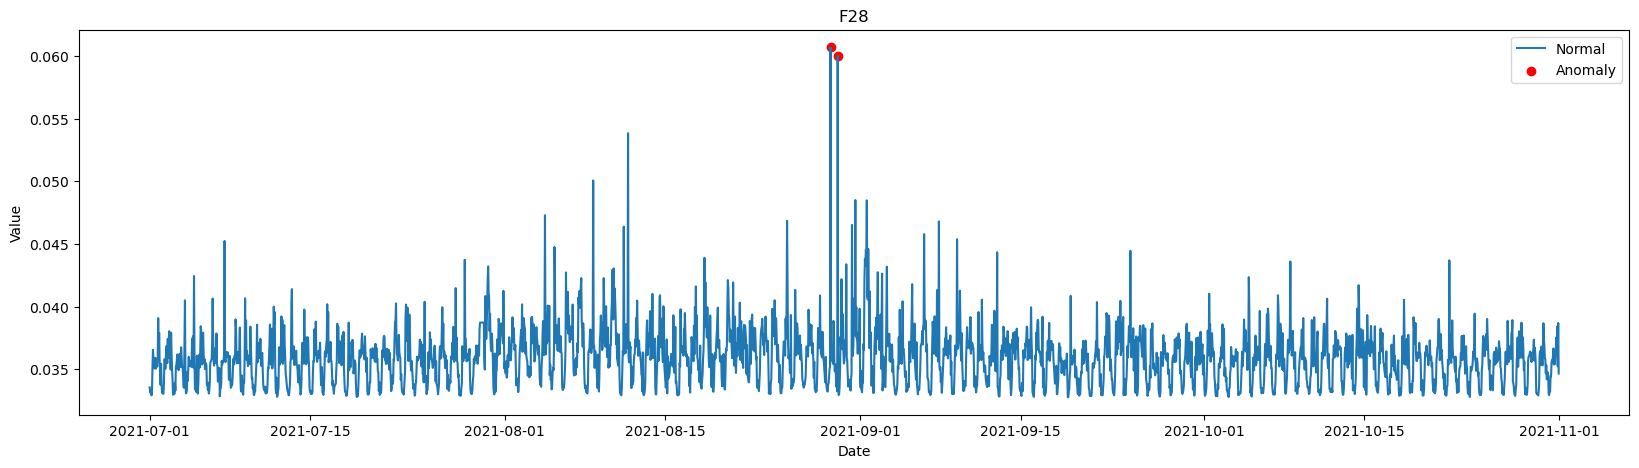

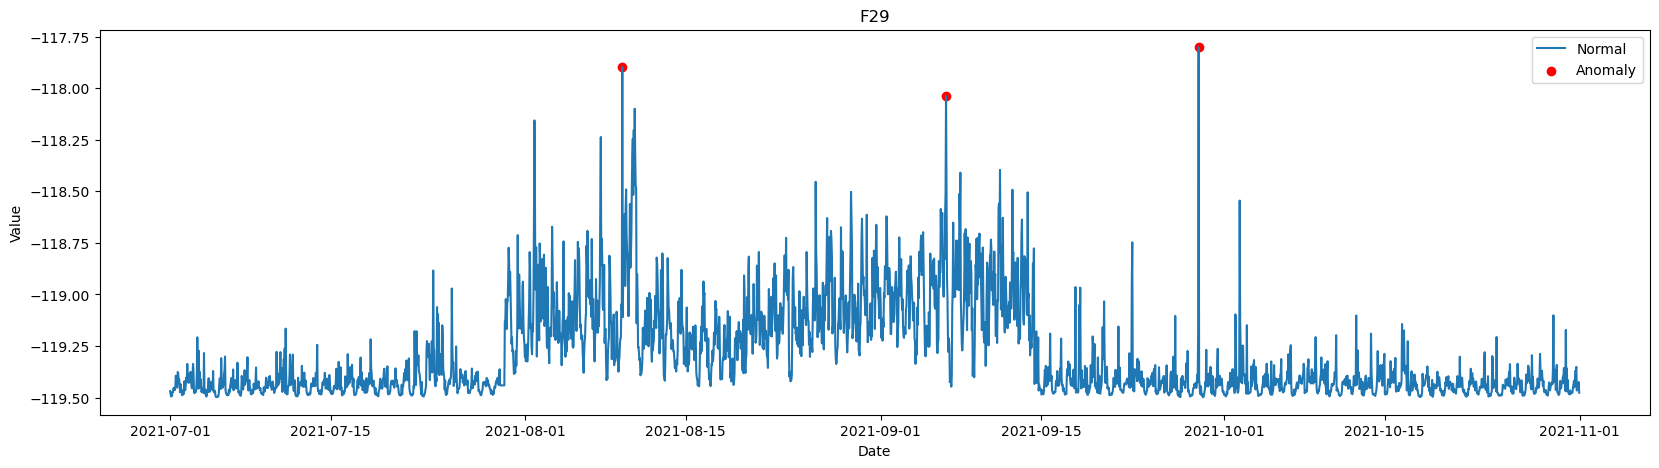

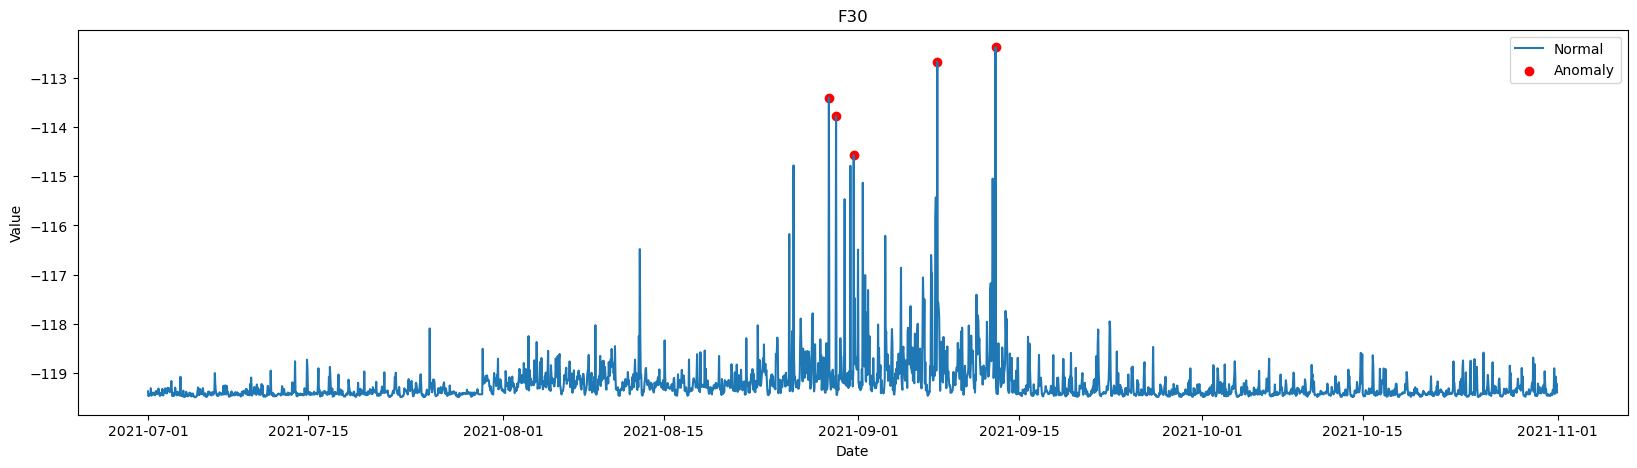

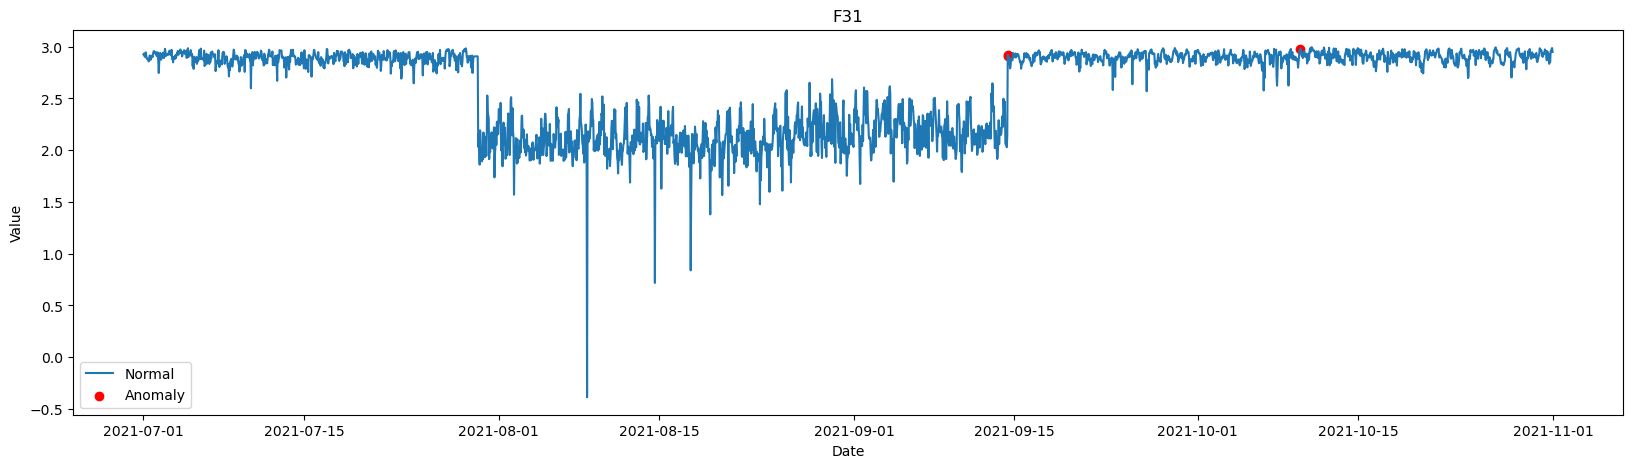

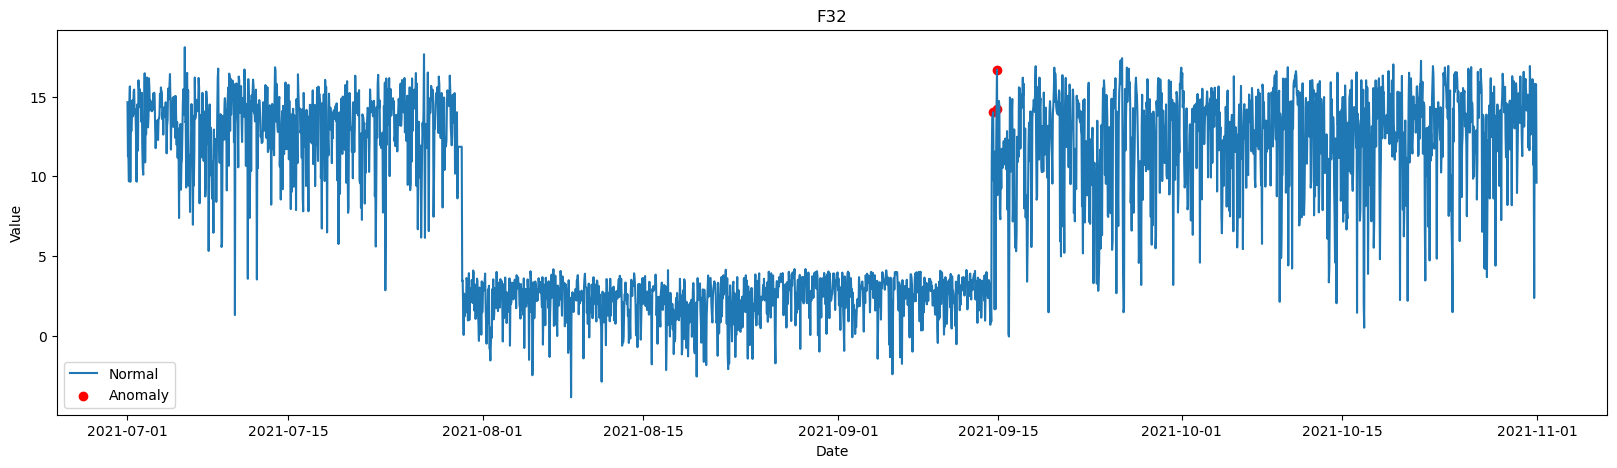

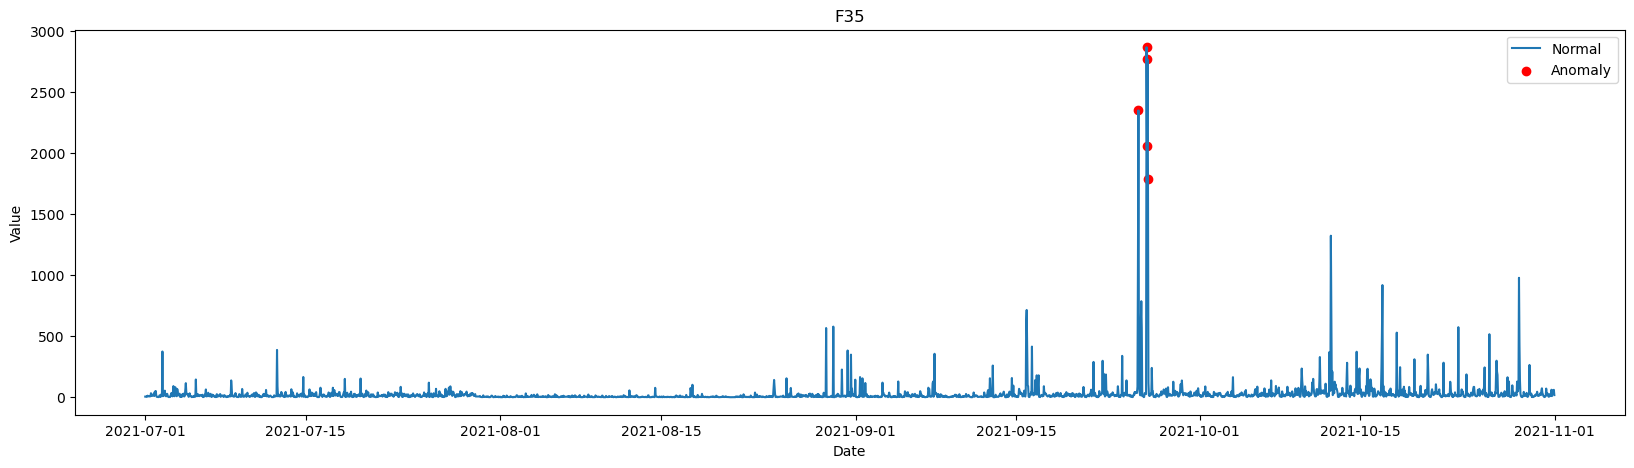

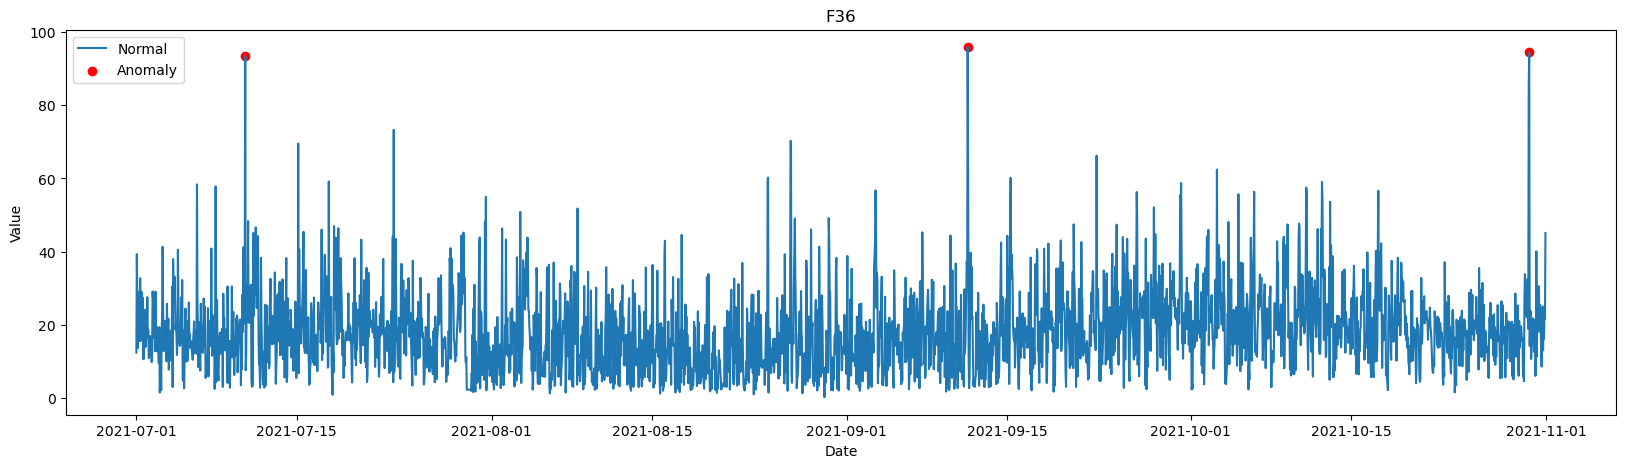

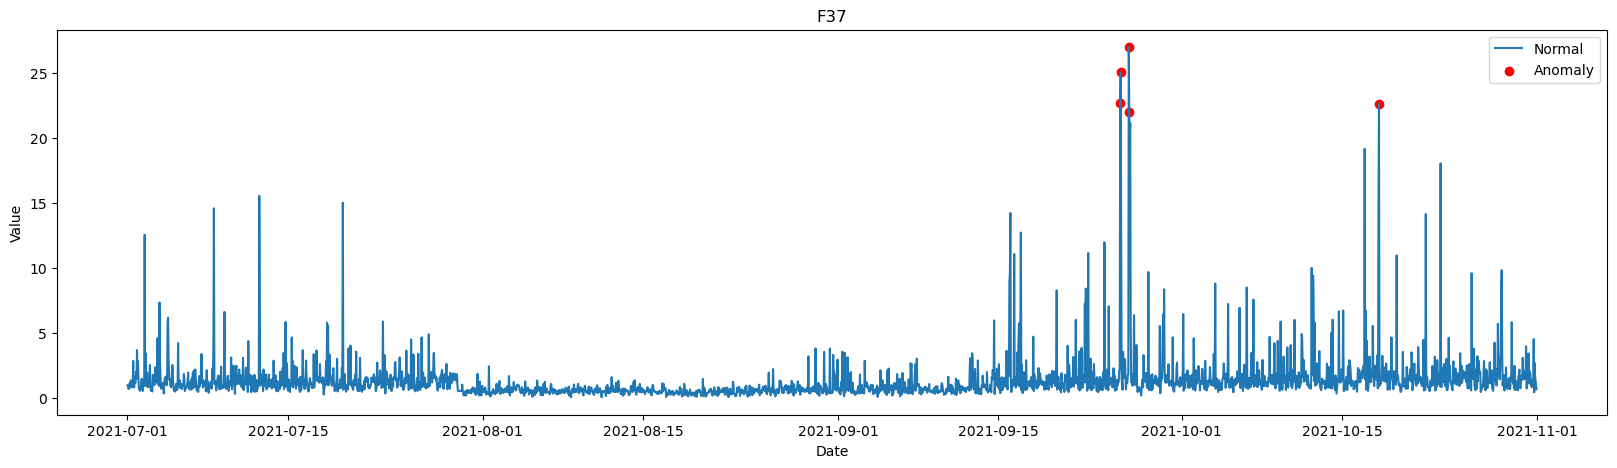

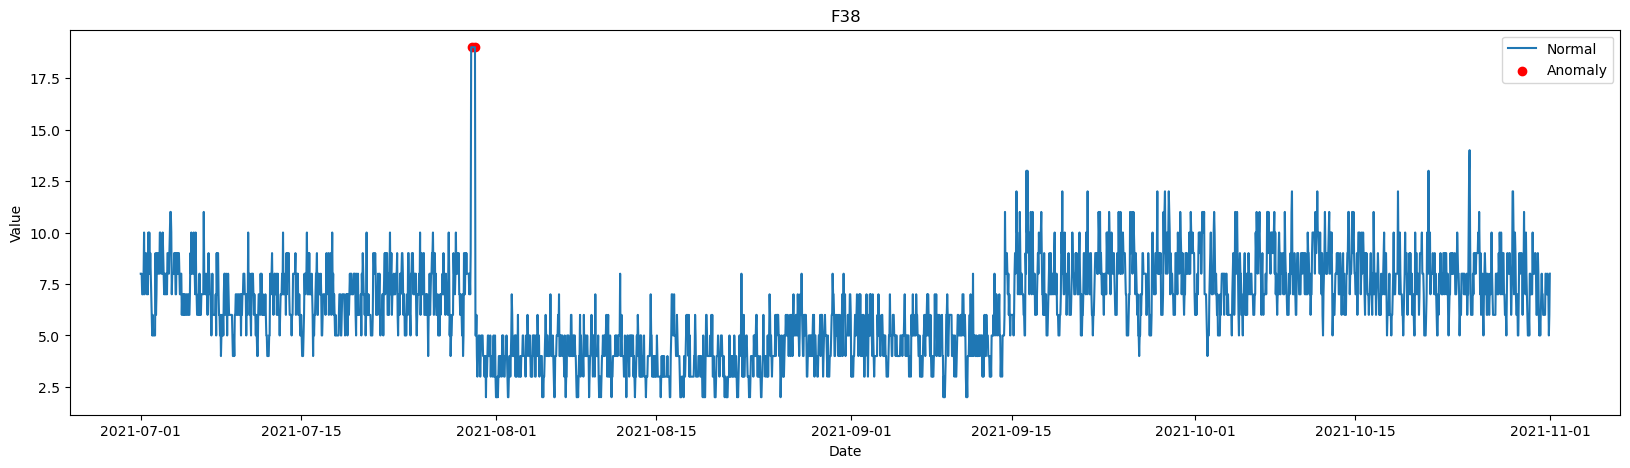

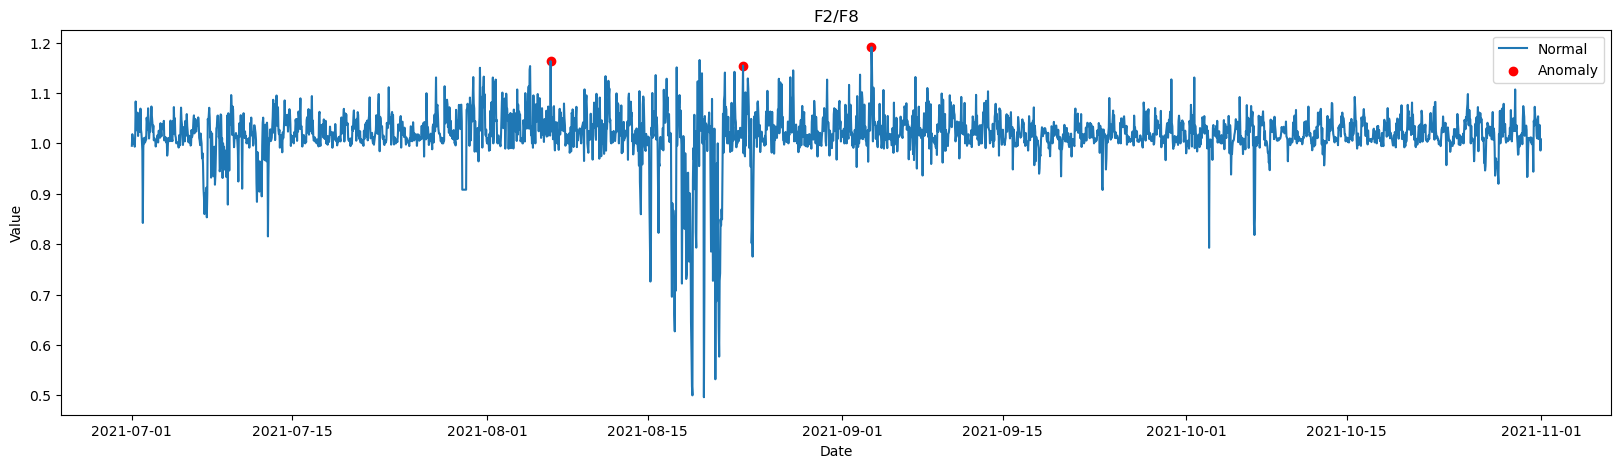

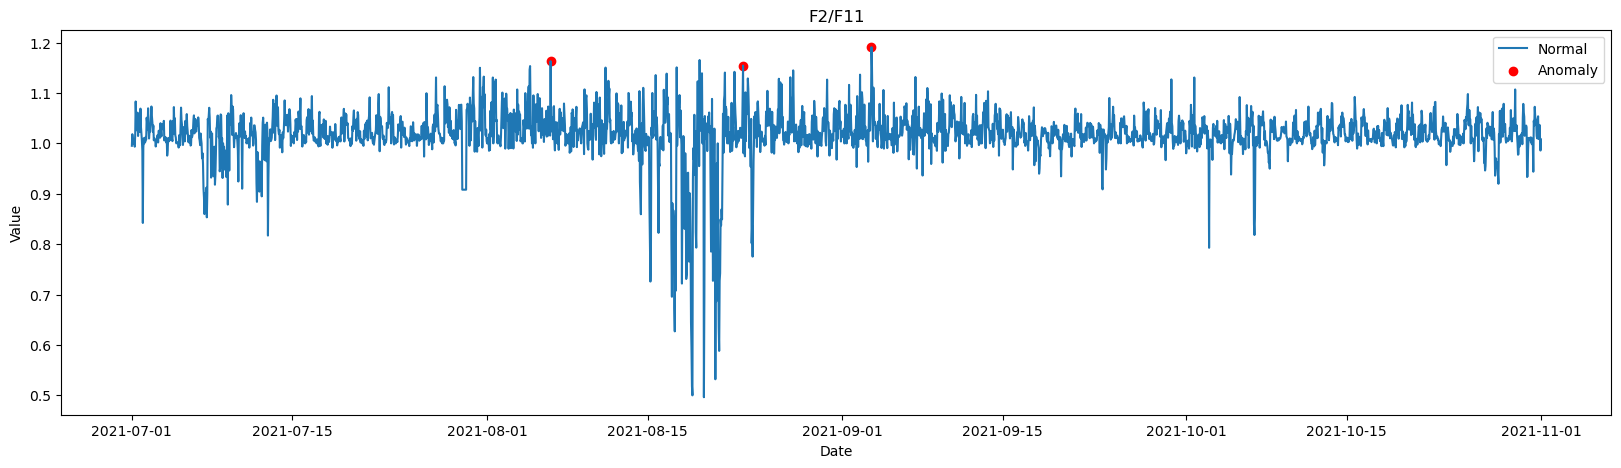

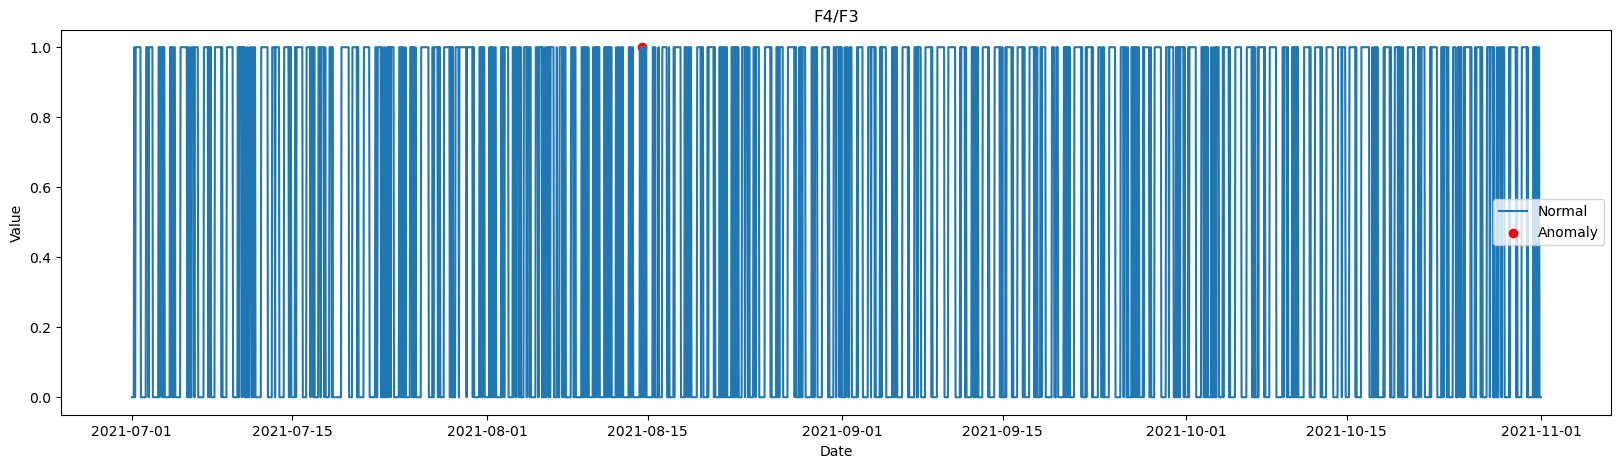

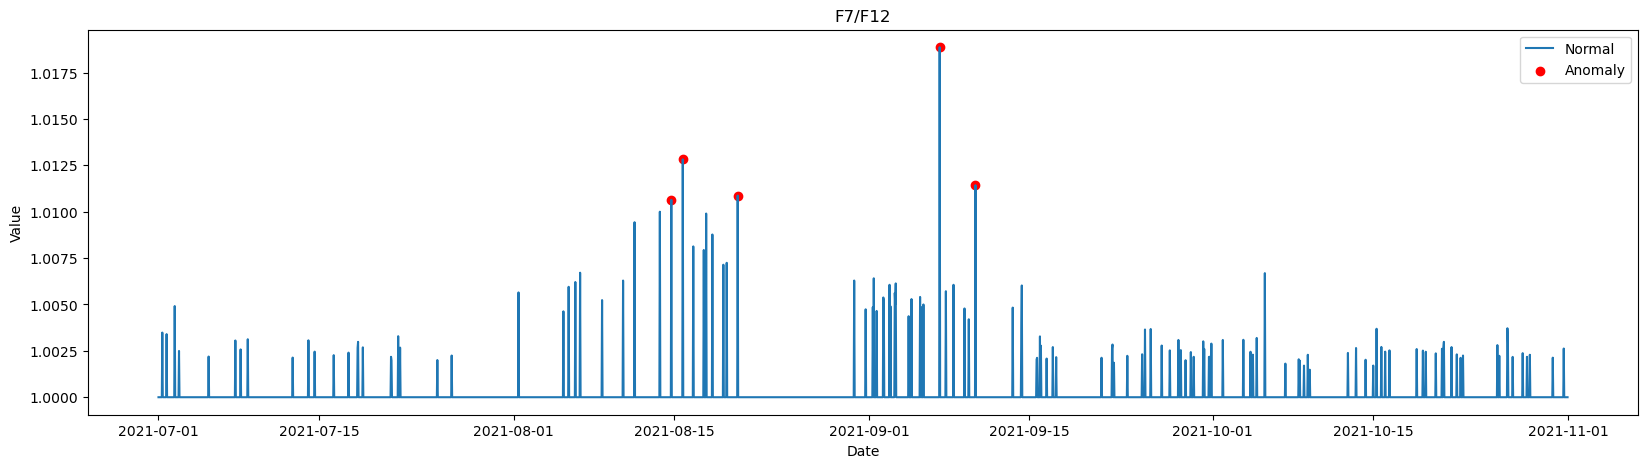

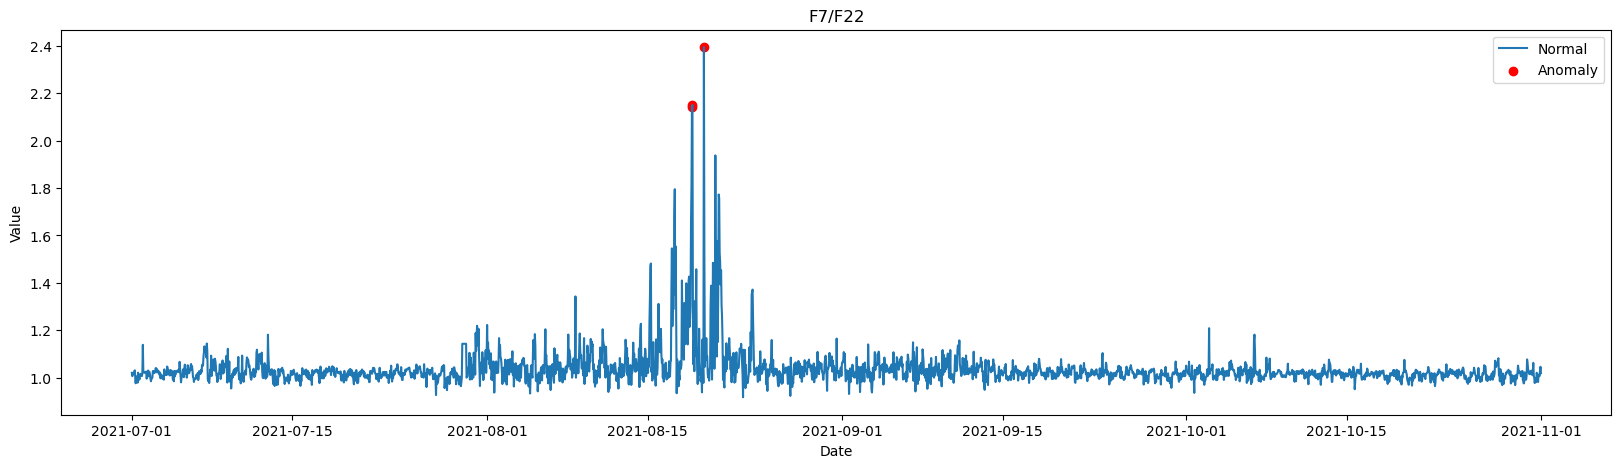

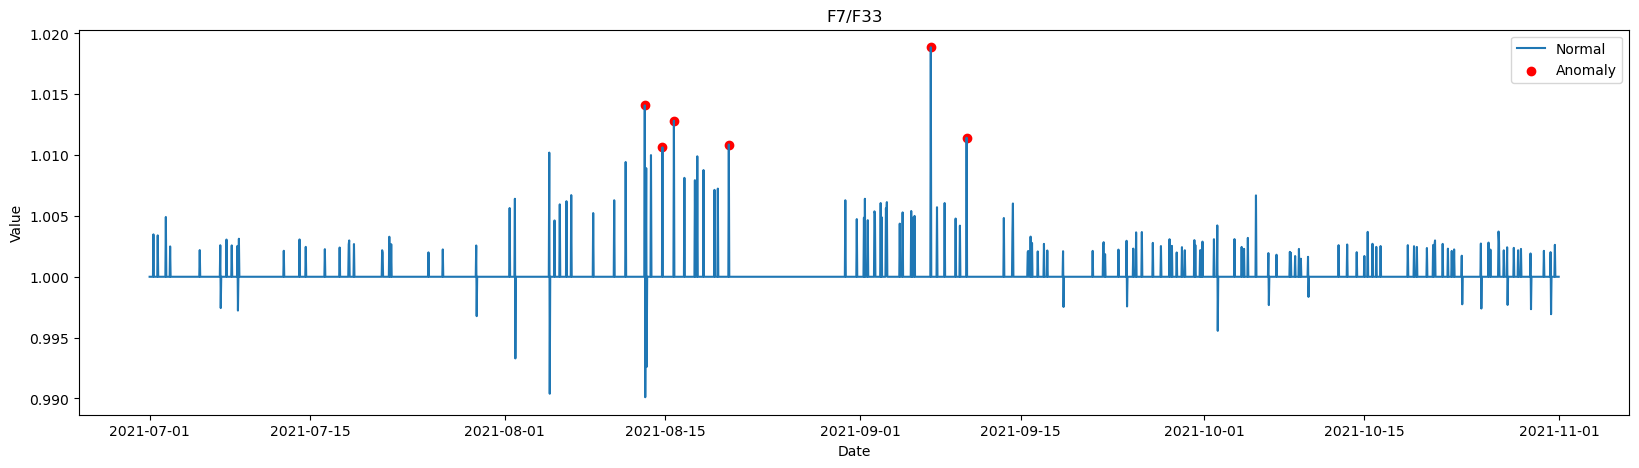

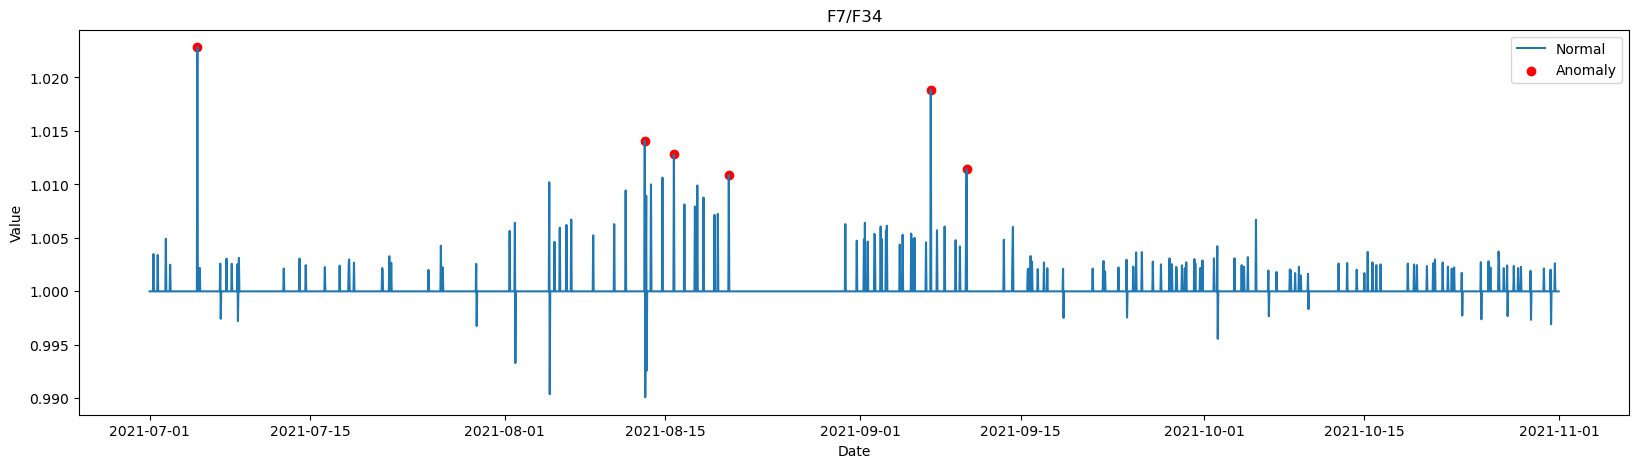

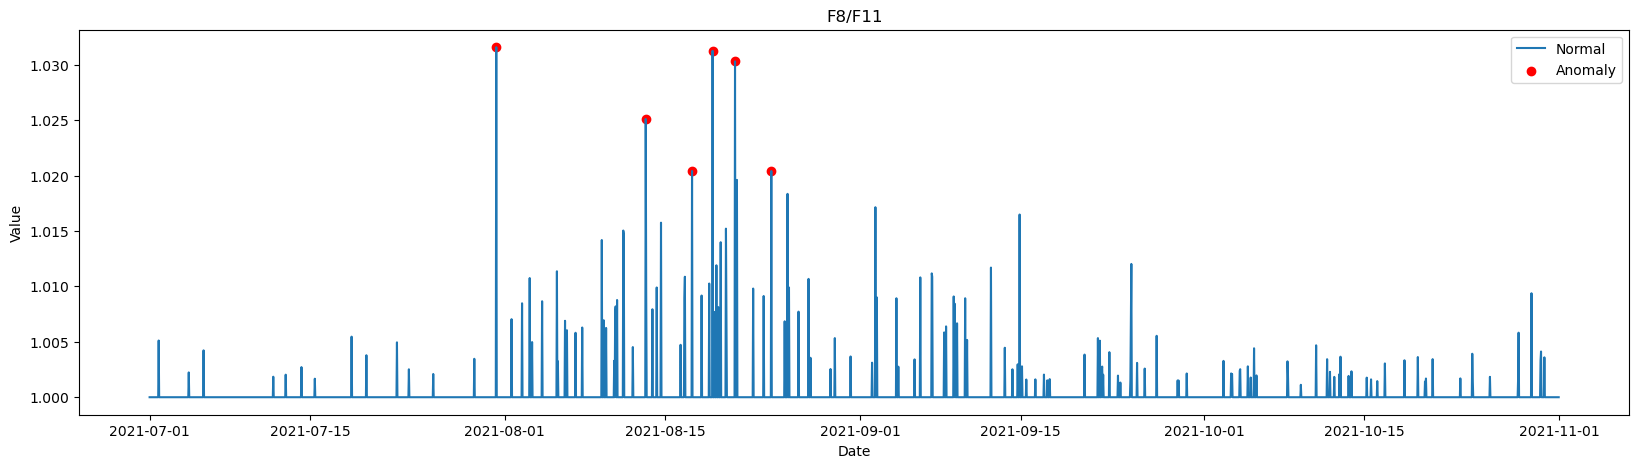

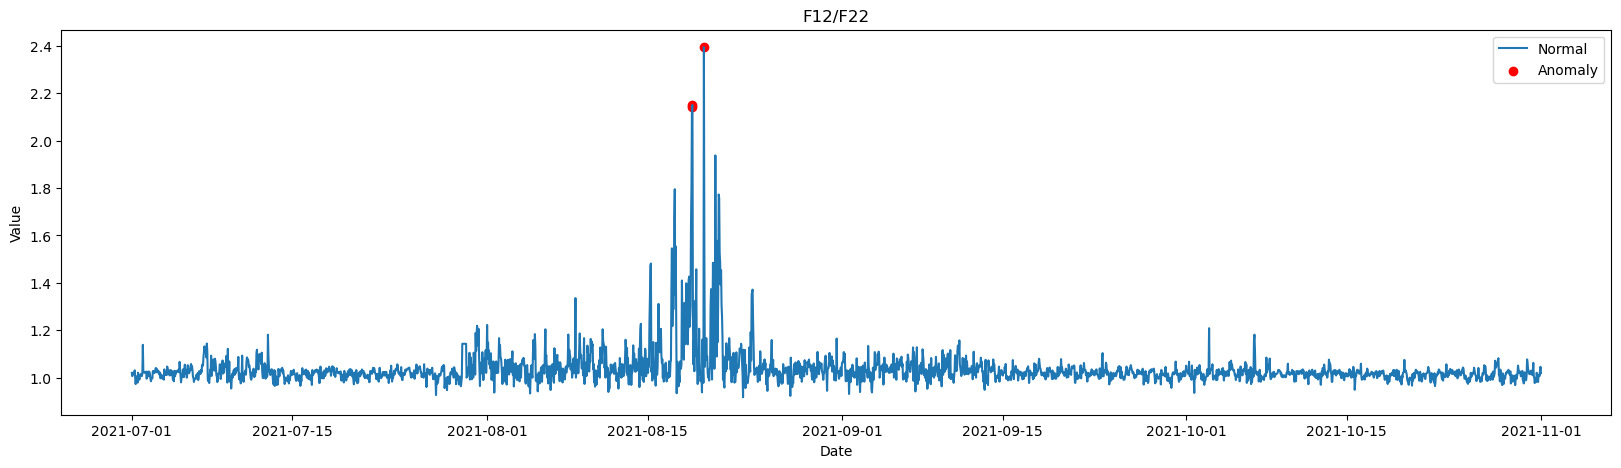

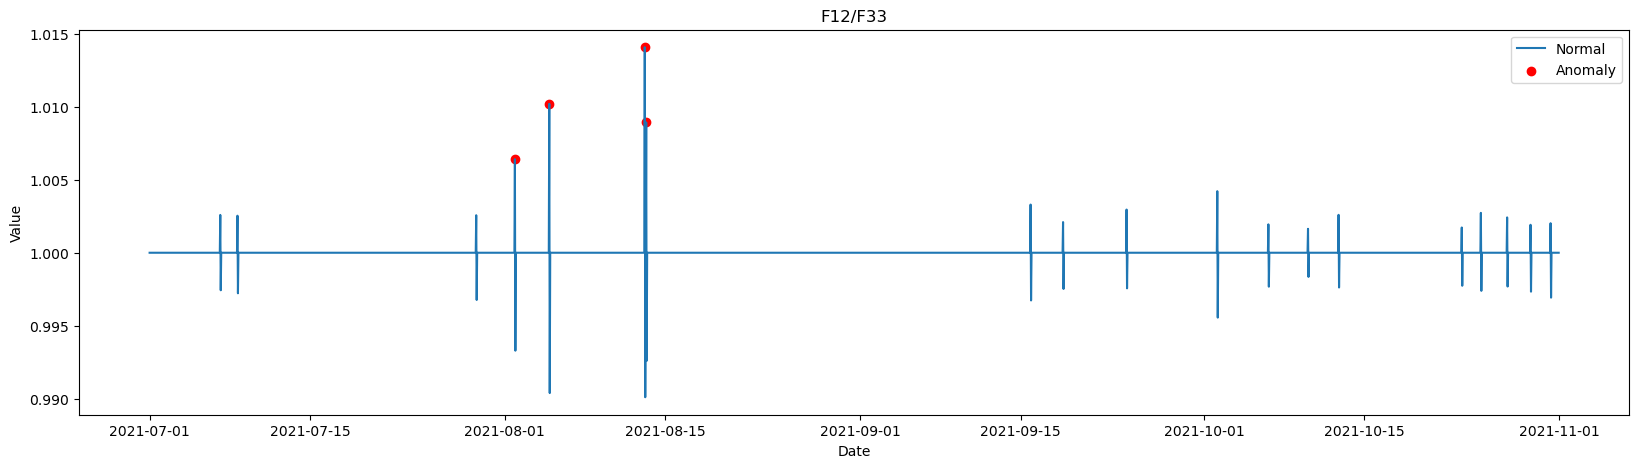

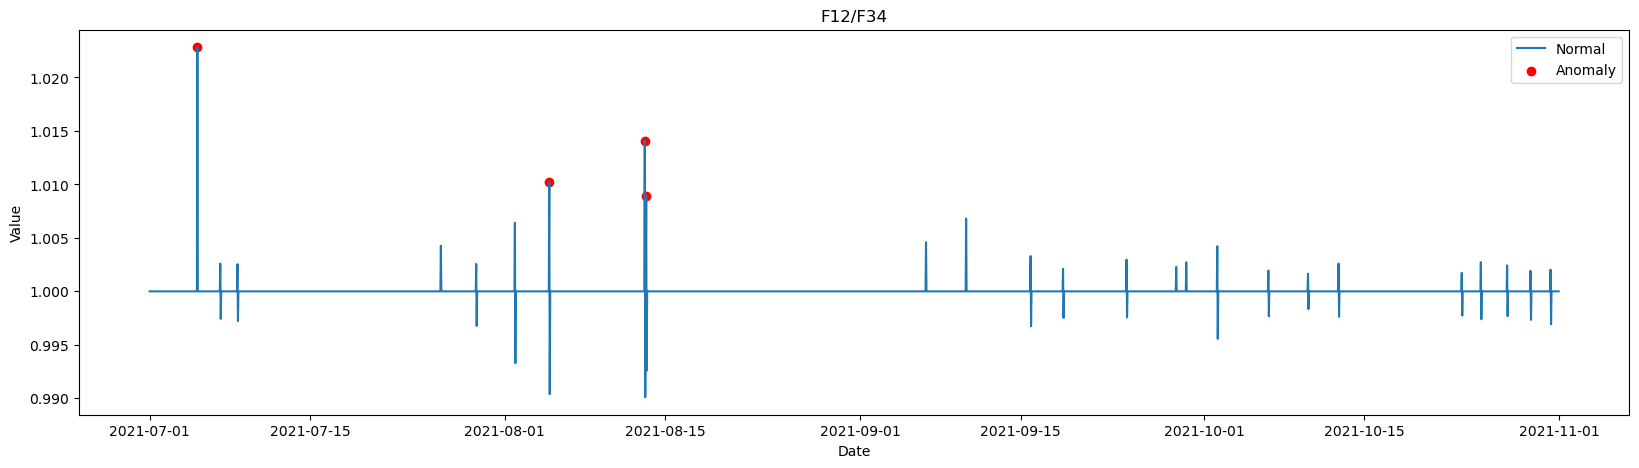

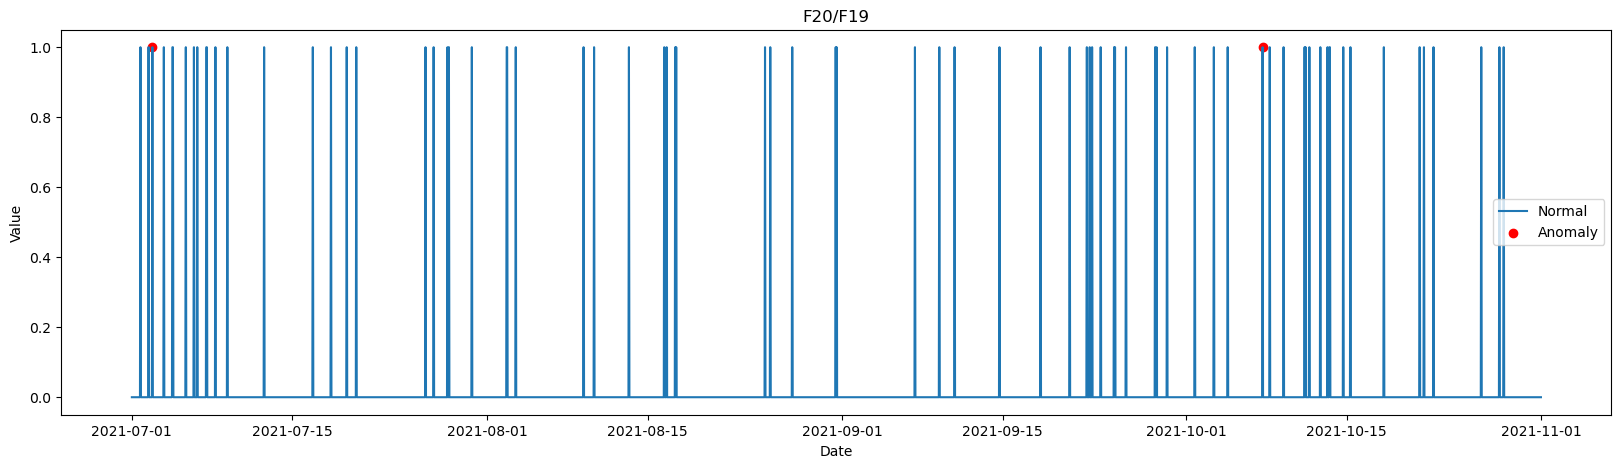

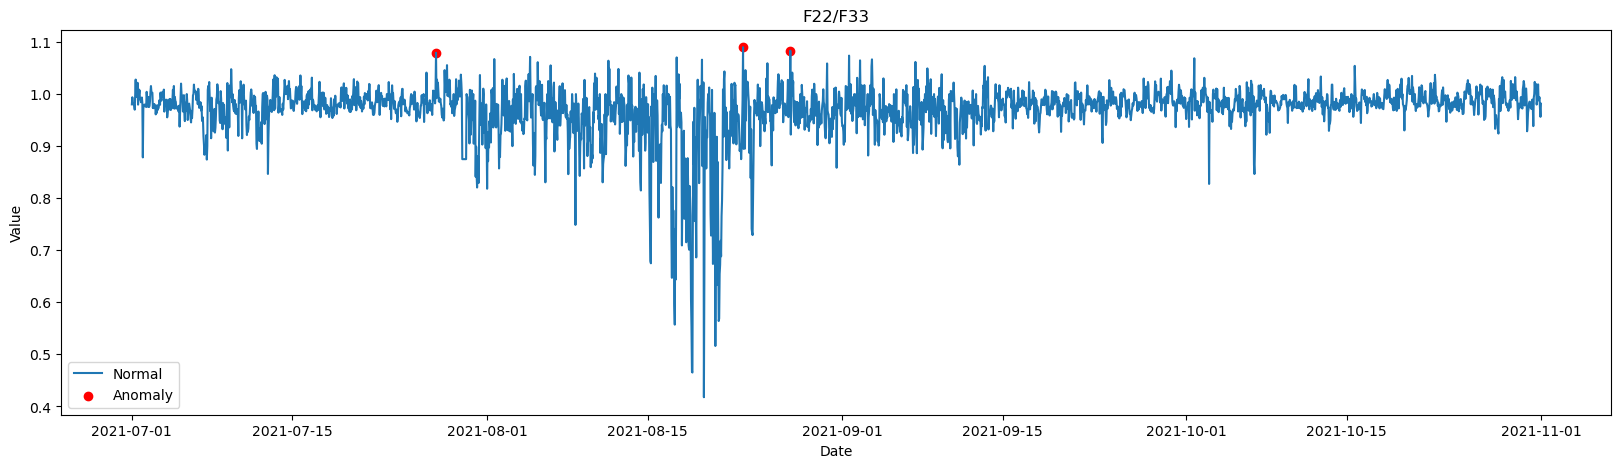

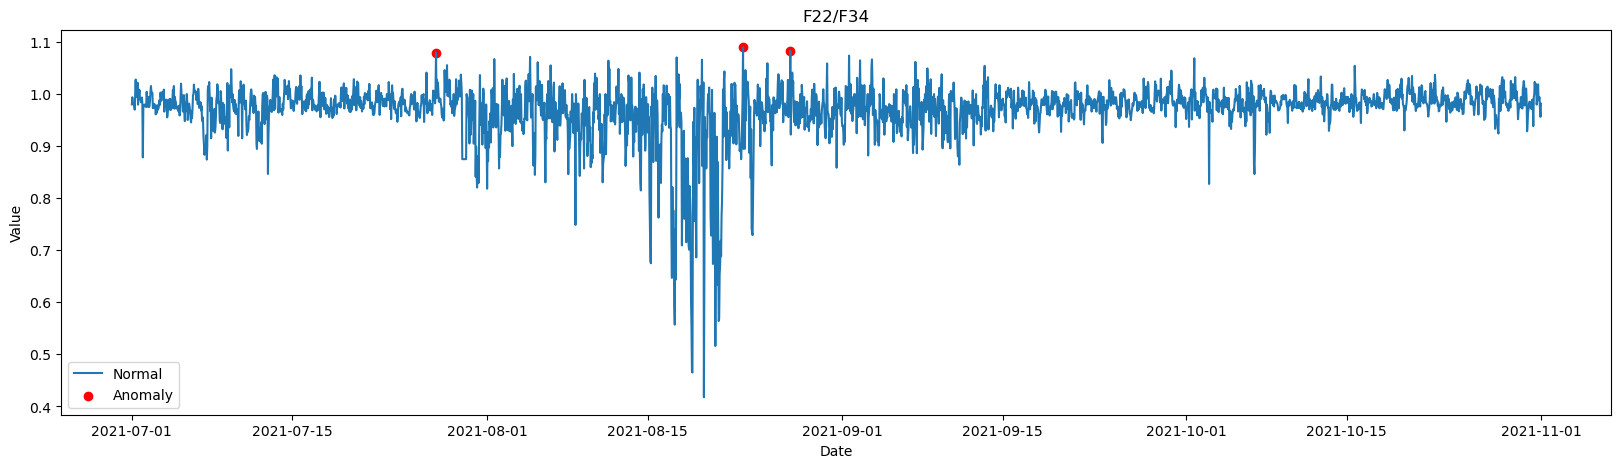

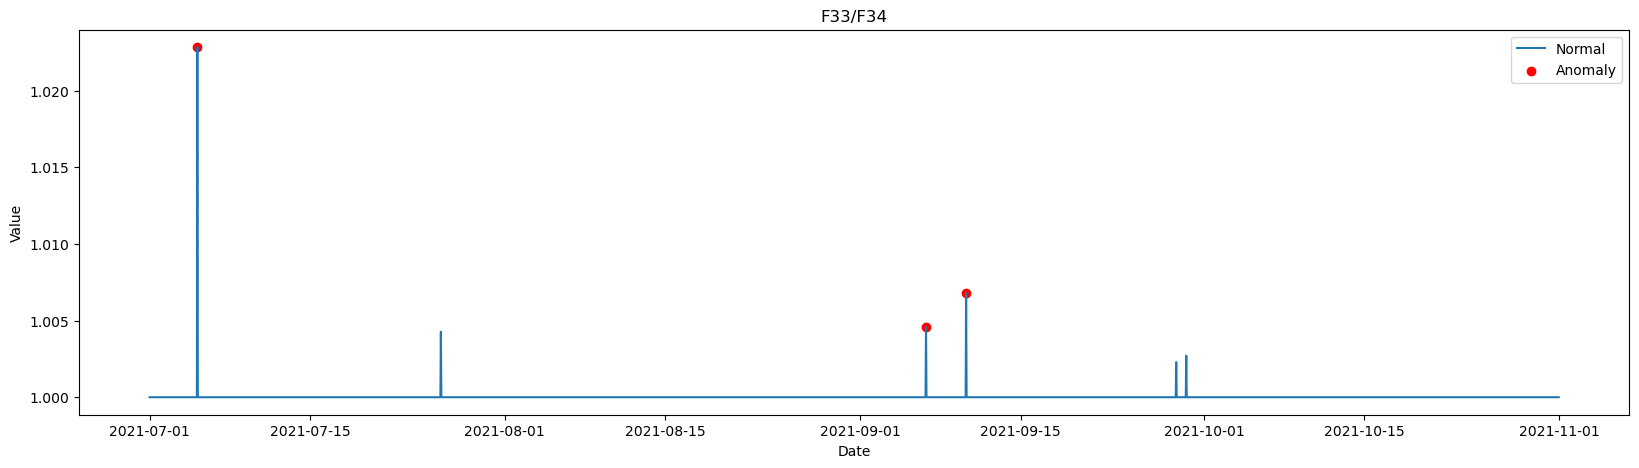

In [55]:
window_size = 40 # size of moving window

for col in df.columns:
    # calculate rolling IQR
    q1 = df[col].rolling(window_size).quantile(0.25)
    q3 = df[col].rolling(window_size).quantile(0.75)
    iqr = q3 - q1
    
    # calculate upper and lower bounds based on the rolling IQR
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # find anomalies
    anomalies = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    top_n = int(np.ceil(len(anomalies) * 2 / 100))
    top_n_outliers = anomalies.sort_values(by=col, ascending = False).head(top_n)
    
    # plot results
    fig, ax = plt.subplots(figsize=(20,5))
    ax.plot(df.index, df[col], label='Normal')
    ax.scatter(top_n_outliers.index, top_n_outliers[col], color='red', label='Anomaly')
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    
    col_name = col.replace("/", " divided by ")
    plt.savefig(col_name + '_moving_iqr_plot.png')
    
    plt.show()